# Natural Language Processing with Disaster Tweets

I have used a dataset from [Kaggle competition] ("https://www.kaggle.com/c/nlp-getting-started") and used simple tools for cleaning and training text data.

**I will show you how to : **

*IMPORTING MODULES

*LOADING DATA

*COMMON WORDS USED IN DISASTER TWEETS USING WORD CLOUD

*COMMON WORDS USED IN NON-DISASTER TWEETS USING WORD CLOUD

*DROP UNNECESSARY FEATURE

*FILL MISSING VALUES

*TOKENIZATON

*LEMMATIZATION

*VECTORIZATION

*SPLITING DATA

*MODEL BUILDING

*PREDICTION

*CLASSIFICATION REPORT

*PLOTTING OF CONFUSION MATRIX

#### IMPORTING MODULES

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")


#### LOADING DATA

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [3]:
test_df = pd.read_csv('test.csv')
test_df.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


#### COMMON WORDS USED IN DISASTER TWEETS

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

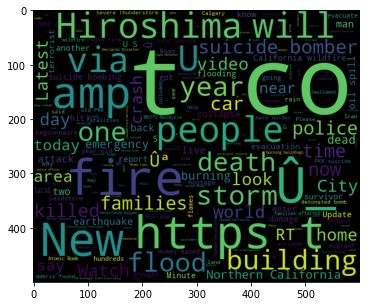

In [5]:
from wordcloud import WordCloud

word_1 = '  '.join(list(train_df[train_df['target']==1]['text']))
word_1 = WordCloud(width=600, height=500).generate(word_1)
plt.figure(figsize=(10, 5))
plt.imshow(word_1)
plt.show()

#### COMMON WORDS USED IN NON-DISASTER TWEETS

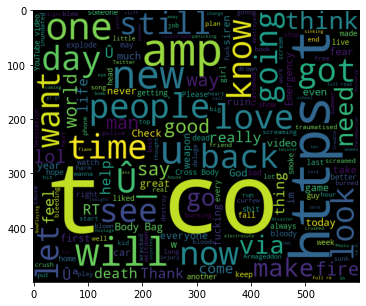

In [6]:
word_0 = '  '.join(list(train_df[train_df['target']==0]['text']))
word_0 = WordCloud(width=600, height=500).generate(word_0)
plt.figure(figsize=(10, 5))
plt.imshow(word_0)
plt.show()

#### DROP UNNECESSARY FEATURE

In [7]:
train_df = train_df.drop('id', axis=1)
test_df = test_df.drop('id', axis=1)

#### FILL MISSING VALUES

In [8]:
train_df['location'] = train_df['location'].fillna('None')
train_df['keyword'] = train_df['keyword'].fillna('None')
test_df['location'] = test_df['location'].fillna('None')
test_df['keyword'] = test_df['keyword'].fillna('None')

#### TOKENIZATON

In [9]:
import nltk
from nltk import TweetTokenizer

tokenizer = TweetTokenizer()

train_df['tokens'] = [tokenizer.tokenize(item) for item in train_df.text]
test_df['tokens'] = [tokenizer.tokenize(item) for item in test_df.text]

#### LEMMATIZATION

In [10]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_item(item):
    new_item = []
    for x in item:
        x = lemmatizer.lemmatize(x)
        new_item.append(x)
    return " ".join(new_item)

In [11]:
train_df['tokens'] = [lemmatize_item(item) for item in train_df.tokens]
test_df['tokens'] = [lemmatize_item(item) for item in test_df.tokens]

####  VECTORIZATION

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
target = train_df['target']
train_df = train_df.drop('target', axis=1)
train_x_vec = vectorizer.fit_transform(train_df.tokens)
test_x_vec = vectorizer.transform(test_df.tokens)

#### SPLITING DATA

In [13]:
X = train_x_vec
y = target

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)

####  MODEL BUILDING

In [15]:
from sklearn.svm import SVC

class_svc = SVC()
class_svc.fit(X_train, y_train)


SVC()

#### PREDICTION

In [16]:
y_pred_svc = class_svc.predict(X_Test)
y_pred_svc

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [17]:
from sklearn.metrics import classification_report, plot_confusion_matrix

#### CLASSIFICATION REPORT

In [18]:
class_report_svc = classification_report(y_Test, y_pred_svc)
print('\t\t\tClassification report:\n\n', class_report_svc, '\n')


			Classification report:

               precision    recall  f1-score   support

           0       0.79      0.93      0.86       874
           1       0.87      0.67      0.76       649

    accuracy                           0.82      1523
   macro avg       0.83      0.80      0.81      1523
weighted avg       0.83      0.82      0.81      1523
 



#### PLOTTING OF CONFUSION MATRIX

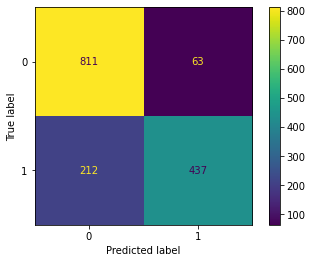

In [20]:
plot_confusion_matrix(class_svc, X_Test, y_Test)
plt.show()